**<font color='#CDDDF1'>Autores: Santiago Garcia**

***Introducción***

Entender el comportamiento en series de tiempo, señales de audio y datos de sensores es un tipo de dato particular, pues no solo contiene información sobre un fenómeno, sino que dicho fenómeno tiene una componente temporal, lo que resulta en un tratamiento completamente diferente para estos datos.

Comprender cómo se procesan las señales secuenciales tiene aplicaciones, como entender el comportamiento del clima, reconocimiento de voz, detección de anomalías en la productividad de una empresa, en la detección de movimientos útil para deportólogos y fisioterapeutas, entre otras aplicaciones.

En este notebook se exploran dos casos muy específicos. El primero corresponde a diferenciar sonidos usuales en una casa, como son: el sonido de una charla por teléfono usando altavoz, el sonido de alguien jugando en un computador, el sonido de alguien trabajando desde casa (Home Office), y el sonido de una cocina.

El segundo caso es el uso del acelerómetro para clasificar 5 clases de movimientos: movimientos en una caminata, movimientos en una sesión de descanso, movimientos subiendo y bajando escaleras, movimientos dentro de un ambiente de Home Office, y movimientos de alguien ordenando una pieza.

A partir de estos dos casos, se busca determinar qué tipo de método de procesamiento es mejor para poder hacer predicciones más correctas. Para ello, se comparan las redes ***Conv1D***, ***Conv2D***, ***MLP*** y ***RNN***.

***Marco Teórico***

El procesamiento de señales se utiliza para el procesamiento de audio, análisis de series temporales, reconocimiento de actividad humana, etc. Para procesar señales, realizar inferencias, predicciones y clasificaciones se usan redes neuronales como Conv1D, Keras Conv2D, MLP y Redes Neuronales Recurrentes. Esto se debe a que, por lo general, las señales se procesan como espectrogramas, los cuales son imágenes que se pueden analizar para obtener información que, a simple vista, no es posible discernir. Para entender las razones del uso de estas redes neuronales, a continuación, una breve explicación:

* Keras Conv1D y Keras Conv2D son Redes Neuronales convolucionales utilizadas principalmente para el procesamiento de datos unidimensionales (Conv1D) y bidimensionales (Conv2D). Estas son útiles para extraer información de una señal, como patrones temporales (Conv1D) o patrones espaciales (Conv2D).

* MLP es un tipo de red neuronal artificial con una capa de neuronas de entrada, una o más capas ocultas y una capa de salida. Este tipo de red neuronal se puede utilizar para tareas de clasificación, regresión o detección de anomalías. Las capas de MLP procesan las señales como un vector de características, centrándose principalmente en las diferentes partes de la señal.

* Redes Neuronales Recurrentes (RNN) son un tipo de red neuronal usada para modelar datos secuenciales, donde la salida depende de una entrada actual y de la salida anterior. Son muy útiles para el reconocimiento de voz y el análisis de series temporales.


***Problema a Solucionar***

El problema presentado consiste en reconocer y diferenciar 5 actividades realizadas normalmente por una persona que trabaja desde casa (Home Office). Estas actividades pueden incluir caminar, subir escaleras, trabajar en la oficina, ordenar su lugar de trabajo o la casa en general. También implica diferenciar y clasificar los sonidos que se presentan de manera habitual a lo largo del día en una casa, en un barrio tranquilo como lo es Multicentro.

***Planteamiento de la solucion***

Para dar solución a esto, se procede a tomar muestras de las actividades y sonidos mencionados anteriormente usando los sensores y micrófonos de un celular, así como la plataforma Edge Impulse para almacenar los datos. Una vez hecho esto, se procede a la transformación y análisis de la información utilizando métodos de procesamiento de datos secuenciales como: ***Conv1D***, ***Conv2D***, ***MLP*** y ***RNN**. Cada modelo será evaluado para determinar cuál tiene un mejor desempeño para futuras aplicaciones de este tipo.

## ***Librerias***

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers 
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import pathlib as pl
import matplotlib as mpl
from IPython import display
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import os

# **Funciones**

In [2]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav,sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav,axis=1)
    return wav

def preprocess(wave):
    wav = wave[0:1000000]
    spectrogram = tf.signal.stft(wav,frame_length=255,frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

def Obtener_dataset(data_set):    
    Num_files = len(data_set)
    Datos = np.zeros((Num_files*611,3)) 
    i = 0
    for file in data_set:
        Data = pd.read_json(file)
        Valores = Data.iloc[:,:].values
        Datos_aux= Valores[7,2][0:-1]
        Datos_aux2 = np.array(Datos_aux)
        Datos[i*611:(i+1)*611] = Datos_aux2
        i+=1
    return Datos

# **Audios**

## **Etapa 1: Carga de Datos**

### Charlas

In [3]:
# Train
ruta = "./Muestras_Audio_Train/Charla1.wav"
wave_c_1 = load_wav_16k_mono(ruta)
espc_c_1 = preprocess(wave_c_1)

ruta = "./Muestras_Audio_Train/Charla2.wav"
wave_c_2 = load_wav_16k_mono(ruta)
espc_c_2 = preprocess(wave_c_2)

ruta = "./Muestras_Audio_Train/Charla3.wav"
wave_c_3 = load_wav_16k_mono(ruta)
espc_c_3 = preprocess(wave_c_3)

ruta = "./Muestras_Audio_Train/Charla4.wav"
wave_c_4 = load_wav_16k_mono(ruta)
espc_c_4 = preprocess(wave_c_4)

ruta = "./Muestras_Audio_Train/Charla5.wav"
wave_c_5 = load_wav_16k_mono(ruta)
espc_c_5 = preprocess(wave_c_5)

ruta = "./Muestras_Audio_Train/Charla6.wav"
wave_c_6 = load_wav_16k_mono(ruta)
espc_c_6 = preprocess(wave_c_6)

## Test
ruta = "./Muestras_Audio_test/Charla1.wav"
wave_c_1_t = load_wav_16k_mono(ruta)
espc_c_1_t = preprocess(wave_c_1_t)

ruta = "./Muestras_Audio_test/Charla2.wav"
wave_c_2_t = load_wav_16k_mono(ruta)
espc_c_2_t = preprocess(wave_c_2_t)

ruta = "./Muestras_Audio_test/Charla3.wav"
wave_c_3_t = load_wav_16k_mono(ruta)
espc_c_3_t = preprocess(wave_c_3_t)

print(espc_c_1.shape)
print(espc_c_2.shape)
print(espc_c_3.shape)
print(espc_c_4.shape)
print(espc_c_5.shape)
print(espc_c_6.shape)

(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)


### Game

In [4]:
# Train
ruta = "./Muestras_Audio_Train/Game1.wav"
wave_g_1 = load_wav_16k_mono(ruta)
espc_g_1 = preprocess(wave_g_1)

ruta = "./Muestras_Audio_Train/Game2.wav"
wave_g_2 = load_wav_16k_mono(ruta)
espc_g_2 = preprocess(wave_g_2)

ruta = "./Muestras_Audio_Train/Game3.wav"
wave_g_3 = load_wav_16k_mono(ruta)
espc_g_3 = preprocess(wave_g_3)

ruta = "./Muestras_Audio_Train/Game4.wav"
wave_g_4 = load_wav_16k_mono(ruta)
espc_g_4 = preprocess(wave_g_4)

ruta = "./Muestras_Audio_Train/Game5.wav"
wave_g_5 = load_wav_16k_mono(ruta)
espc_g_5 = preprocess(wave_g_5)

ruta = "./Muestras_Audio_Train/Game6.wav"
wave_g_6 = load_wav_16k_mono(ruta)
espc_g_6 = preprocess(wave_g_6)

# Test
ruta = "./Muestras_Audio_test/Game1.wav"
wave_g_1_t = load_wav_16k_mono(ruta)
espc_g_1_t = preprocess(wave_g_1_t)

ruta = "./Muestras_Audio_test/Game2.wav"
wave_g_2_t = load_wav_16k_mono(ruta)
espc_g_2_t = preprocess(wave_g_2_t)

ruta = "./Muestras_Audio_test/Game3.wav"
wave_g_3_t = load_wav_16k_mono(ruta)
espc_g_3_t = preprocess(wave_g_3_t)

print(espc_g_1.shape)
print(espc_g_2.shape)
print(espc_g_3.shape)
print(espc_g_4.shape)
print(espc_g_5.shape)
print(espc_g_6.shape)
print(espc_g_3_t.shape)

(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)


### Home Office

In [5]:
# Train
ruta = "./Muestras_Audio_Train/home_office1.wav"
wave_ho_1 = load_wav_16k_mono(ruta)
espc_ho_1 = preprocess(wave_ho_1)
print(espc_ho_1.shape)

ruta = "./Muestras_Audio_Train/home_office2.wav"
wave_ho_2 = load_wav_16k_mono(ruta)
espc_ho_2 = preprocess(wave_ho_2)
print(espc_ho_2.shape)

ruta = "./Muestras_Audio_Train/home_office3.wav"
wave_ho_3 = load_wav_16k_mono(ruta)
espc_ho_3 = preprocess(wave_ho_3)
print(espc_ho_3.shape)

ruta = "./Muestras_Audio_Train/home_office4.wav"
wave_ho_4 = load_wav_16k_mono(ruta)
espc_ho_4 = preprocess(wave_ho_4)
print(espc_ho_4.shape)

ruta = "./Muestras_Audio_Train/home_office5.wav"
wave_ho_5 = load_wav_16k_mono(ruta)
espc_ho_5 = preprocess(wave_ho_5)
print(espc_ho_5.shape)

ruta = "./Muestras_Audio_Train/home_office6.wav"
wave_ho_6 = load_wav_16k_mono(ruta)
espc_ho_6 = preprocess(wave_ho_6)
print(espc_ho_6.shape)

# Test
ruta = "./Muestras_Audio_test/home_office1.wav"
wave_ho_1_t = load_wav_16k_mono(ruta)
espc_ho_1_t = preprocess(wave_ho_1_t)

ruta = "./Muestras_Audio_test/home_office2.wav"
wave_ho_2_t = load_wav_16k_mono(ruta)
espc_ho_2_t = preprocess(wave_ho_2_t)

ruta = "./Muestras_Audio_test/home_office3.wav"
wave_ho_3_t = load_wav_16k_mono(ruta)
espc_ho_2_t = preprocess(wave_ho_3_t)

(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)


### Cocina

In [6]:
# Train
ruta = "./Muestras_Audio_Train/Cocina1.wav"
wave_co_1 = load_wav_16k_mono(ruta)
espc_co_1 = preprocess(wave_co_1)

ruta = "./Muestras_Audio_Train/Cocina2.wav"
wave_co_2 = load_wav_16k_mono(ruta)
espc_co_2 = preprocess(wave_co_2)

ruta = "./Muestras_Audio_Train/Cocina3.wav"
wave_co_3 = load_wav_16k_mono(ruta)
espc_co_3 = preprocess(wave_co_3)

ruta = "./Muestras_Audio_Train/Cocina4.wav"
wave_co_4 = load_wav_16k_mono(ruta)
espc_co_4 = preprocess(wave_co_4)

ruta = "./Muestras_Audio_Train/Cocina5.wav"
wave_co_5 = load_wav_16k_mono(ruta)
espc_co_5 = preprocess(wave_co_5)

ruta = "./Muestras_Audio_Train/Cocina6.wav"
wave_co_6 = load_wav_16k_mono(ruta)
espc_co_6 = preprocess(wave_co_6)

# Test
ruta = "./Muestras_Audio_Train/Cocina1.wav"
wave_co_1_t = load_wav_16k_mono(ruta)
espc_co_1_t = preprocess(wave_co_1_t)

ruta = "./Muestras_Audio_test/Cocina2.wav"
wave_co_2_t = load_wav_16k_mono(ruta)
espc_co_2_t = preprocess(wave_co_2_t)

ruta = "./Muestras_Audio_test/Cocina3.wav"
wave_co_3_t = load_wav_16k_mono(ruta)
espc_co_3_t = preprocess(wave_co_3_t)

print(espc_co_1.shape)
print(espc_co_2.shape)
print(espc_co_3.shape)
print(espc_co_4.shape)
print(espc_co_5.shape)
print(espc_co_3_t.shape)

(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)


### Sala

In [7]:
# Train
ruta = "./Muestras_Audio_Train/sala1.wav"
wave_s_1 = load_wav_16k_mono(ruta)
espc_s_1 = preprocess(wave_s_1)

ruta = "./Muestras_Audio_Train/sala2.wav"
wave_s_2 = load_wav_16k_mono(ruta)
espc_s_2 = preprocess(wave_s_2)

ruta = "./Muestras_Audio_Train/sala3.wav"
wave_s_3 = load_wav_16k_mono(ruta)
espc_s_3 = preprocess(wave_s_3)

ruta = "./Muestras_Audio_Train/sala4.wav"
wave_s_4 = load_wav_16k_mono(ruta)
espc_s_4 = preprocess(wave_s_4)

ruta = "./Muestras_Audio_Train/sala5.wav"
wave_s_5 = load_wav_16k_mono(ruta)
espc_s_5 = preprocess(wave_s_5)

ruta = "./Muestras_Audio_Train/sala6.wav"
wave_s_6 = load_wav_16k_mono(ruta)
espc_s_6 = preprocess(wave_s_6)


# Test
ruta = "./Muestras_Audio_test/sala1.wav"
wave_s_1_t = load_wav_16k_mono(ruta)
espc_s_1_t = preprocess(wave_s_1_t)

ruta = "./Muestras_Audio_test/sala2.wav"
wave_s_2_t = load_wav_16k_mono(ruta)
espc_s_2_t = preprocess(wave_s_2_t)

ruta = "./Muestras_Audio_test/sala3.wav"
wave_s_3_t = load_wav_16k_mono(ruta)
espc_s_3_t = preprocess(wave_s_3_t)

print(espc_s_1.shape)
print(espc_s_2.shape)
print(espc_s_3.shape)
print(espc_s_4.shape)
print(espc_s_5.shape)
print(espc_s_3_t.shape)

(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)
(1249, 129)


## **Etapa 2: Crear X_train y Y_train**

### XTrain

In [8]:
Data = np.zeros((30,1249,129))
Data[0,:,:] = espc_c_1
Data[1,:,:] = espc_c_2
Data[2,:,:] = espc_c_3
Data[3,:,:] = espc_c_4
Data[4,:,:] = espc_c_5
Data[5,:,:] = espc_c_6

Data[6,:,:] = espc_g_1
Data[7,:,:] = espc_g_2
Data[8,:,:] = espc_g_3
Data[9,:,:] = espc_g_4
Data[10,:,:] = espc_g_5
Data[11,:,:] = espc_g_6

Data[12,:,:] = espc_ho_1
Data[13,:,:] = espc_ho_2
Data[14,:,:] = espc_ho_3
Data[15,:,:] = espc_ho_4
Data[16,:,:] = espc_ho_5
Data[17,:,:] = espc_ho_6

Data[18,:,:] = espc_co_1
Data[19,:,:] = espc_co_2
Data[20,:,:] = espc_co_3
Data[21,:,:] = espc_co_4
Data[22,:,:] = espc_co_5
Data[23,:,:] = espc_co_6

Data[24,:,:] = espc_s_1
Data[25,:,:] = espc_s_2
Data[26,:,:] = espc_s_3
Data[27,:,:] = espc_s_4
Data[28,:,:] = espc_s_5
Data[29,:,:] = espc_s_6
print(Data.shape)
Xtrain = Data
X_train = tf.expand_dims(Data,axis=3)
print(X_train.shape)
print(Xtrain.shape)

(30, 1249, 129)
(30, 1249, 129, 1)
(30, 1249, 129)


###  YTrain

In [9]:
YTrain = np.zeros((30,1))

for i in range(6):
    YTrain[i] = 0
    
for i in range(6,12):
    YTrain[i] = 1

for i in range(12,18):
    YTrain[i] = 2

for i in range(18,24):
    YTrain[i] = 3
    
for i in range(24,30):
    YTrain[i] = 4

In [10]:
YTrain = keras.utils.to_categorical(YTrain)
YTrain.shape

(30, 5)

###  XTest

In [11]:
Data_test = np.zeros((15,1249,129))
Data_test[0,:,:] = espc_c_1_t
Data_test[1,:,:] = espc_c_2_t
Data_test[2,:,:] = espc_c_3_t

Data_test[3,:,:] = espc_g_1_t
Data_test[4,:,:] = espc_g_2_t
Data_test[5,:,:] = espc_g_3_t

Data_test[6,:,:] = espc_ho_1_t
Data_test[7,:,:] = espc_ho_2_t
Data_test[8,:,:] = espc_ho_2_t

Data_test[9,:,:] = espc_co_1_t
Data_test[10,:,:] = espc_co_2_t
Data_test[11,:,:] = espc_co_3_t

Data_test[12,:,:] = espc_s_1_t
Data_test[13,:,:] = espc_s_2_t
Data_test[14,:,:] = espc_s_3_t
print(Data_test.shape)
Xtest = Data_test
X_test = tf.expand_dims(Data_test,axis=3)
print(X_test.shape)
print(Xtest.shape)


(15, 1249, 129)
(15, 1249, 129, 1)
(15, 1249, 129)


###  YTest

In [12]:
YTest = np.zeros((15,1))

for i in range(3):
    YTest[i] = 0
    
for i in range(3,6):
    YTest[i] = 1

for i in range(6,9):
    YTest[i] = 2

for i in range(9,12):
    YTest[i] = 3
    
for i in range(12,15):
    YTest[i] = 4

In [13]:
YTest = keras.utils.to_categorical(YTest)
YTest.shape

(15, 5)

## **Etapa 3: Modelo**

### Crear Modelo Conv1D

In [14]:
modelo1 = keras.models.Sequential()
modelo1.add(keras.layers.Conv1D(32,3,activation='relu',padding='same',input_shape=(1249,129)))
modelo1.add(keras.layers.Conv1D(16,3,activation='relu',padding='same'))
modelo1.add(keras.layers.Conv1D(8,3,activation='relu',padding='same'))
modelo1.add(keras.layers.Conv1D(16,3,activation='relu',padding='same'))
modelo1.add(keras.layers.Conv1D(8,3,activation='relu',padding='same'))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(5,activation='softmax'))

modelo1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
histori = modelo1.fit(Xtrain,YTrain,epochs=50,batch_size=None)

Epoch 1/50
1/1 [==============================] - 1s 584ms/step - loss: 1.6070 - accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 1.4368 - accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 1.3363 - accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 1.2893 - accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 1.2501 - accuracy: 0.2000
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 1.2152 - accuracy: 0.2667
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 1.1830 - accuracy: 0.3000
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 1.1482 - accuracy: 0.3333
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 1.1069 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 1.0580 - accuracy: 0.5667
Epoch 11/50
1/1 [===========

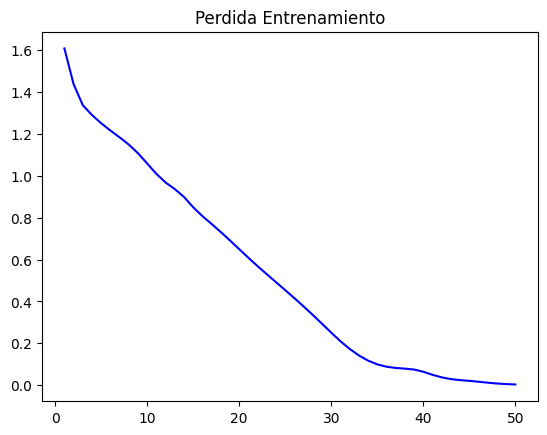

In [15]:
perdida_train = histori.history['loss']
epocas = range(1,len(perdida_train)+1)
plt.plot(epocas,perdida_train,'b',label='Perdida Entrenamiento')
plt.title('Perdida Entrenamiento')
plt.show()

In [16]:
modelo1.evaluate(X_test,YTest)

1/1 [==============================] - 0s 125ms/step - loss: 20.4446 - accuracy: 0.2667


[20.444631576538086, 0.2666666805744171]

1/1 [==============================] - 0s 81ms/step


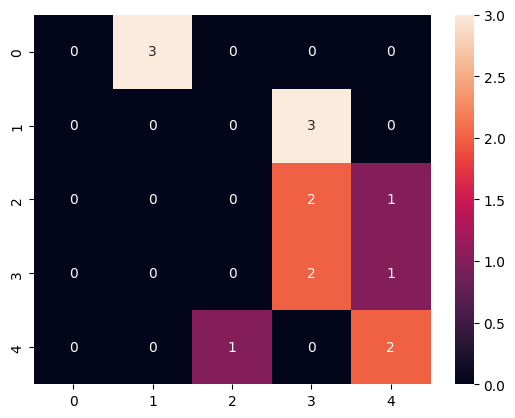

In [17]:
ypredic=modelo1.predict(X_test)

y_test_class = np.argmax(YTest,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
cm = confusion_matrix(y_test_class, y_pred_class)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

### Crear Modelo Conv2D

In [18]:
modelo2 = keras.models.Sequential([layers.Conv2D(64,(5,5),padding ='same',activation ='relu',input_shape = (1249, 129,1)),
                                  layers.MaxPool2D(),
                                  layers.Conv2D(32,(5,5),padding='same',activation='relu'),
                                  layers.MaxPool2D(),
                                  layers.Conv2D(32,(5,5),padding='valid',activation='relu'),
                                  layers.MaxPool2D(),
                                  layers.Flatten(),
                                  layers.Dense(240,activation='relu'),
                                  layers.Dense(120,activation='relu'),
                                  layers.Dense(100,activation='relu'),
                                  layers.Dense(5,activation='softmax')])

modelo2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
histori = modelo2.fit(X_train,YTrain,epochs=20,batch_size=128)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.6016 - accuracy: 0.1667
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.3455 - accuracy: 0.2000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.2097 - accuracy: 0.4000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.0928 - accuracy: 0.3667
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 1.0186 - accuracy: 0.4667
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.9106 - accuracy: 0.5333
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.7866 - accuracy: 0.6000
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.6354 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 0.4695 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.2862 - accuracy: 0.9667
Epoch 11/20
1/1 [==============================] 

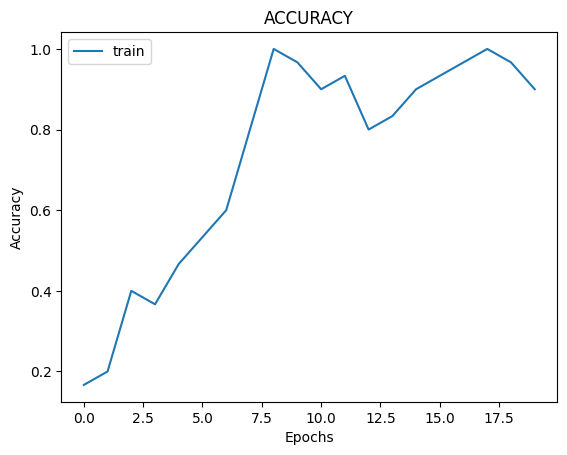

In [19]:
plt.plot(histori.history['accuracy'])
plt.title("ACCURACY")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','validation'], loc= 'upper left')
plt.show()

In [20]:
modelo2.evaluate(X_test,YTest)

1/1 [==============================] - 0s 218ms/step - loss: 5.3760 - accuracy: 0.5333


[5.376016139984131, 0.5333333611488342]

1/1 [==============================] - 0s 204ms/step


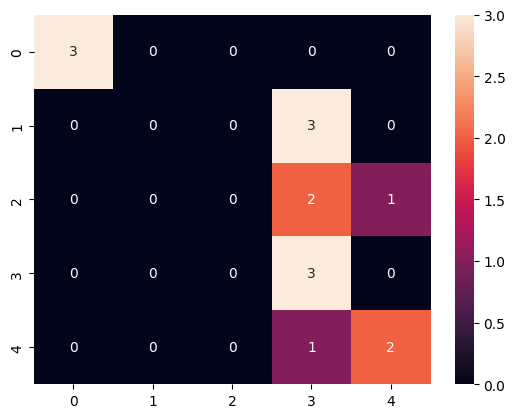

In [21]:
ypredic=modelo2.predict(X_test)

y_test_class = np.argmax(YTest,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
cm = confusion_matrix(y_test_class, y_pred_class)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

### MLP

In [22]:
print(Xtrain.shape)
print(YTrain.shape)

(30, 1249, 129)
(30, 5)


In [23]:
Xtrain = Xtrain.reshape((30,1249*129))
YTrain = YTrain.reshape(30,5)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=100, random_state=42)
mlp.fit(Xtrain, YTrain)

c:\Users\PC\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [25]:
Xtest = Xtest.reshape((15,1249*129))
YTest = YTest.reshape(15,5)

In [26]:
p = mlp.predict(Xtest)
acc = accuracy_score(YTest, p)
print(acc)

0.4


# **HAR**

## **Etapa 1: Carga de Datos**

In [3]:
current_path = pl.Path.cwd()
training_path = current_path.joinpath('Muestras_Acelerometro_Train')
testing_path = current_path.joinpath('Muestras_Acelerometro_test')
train = list(training_path.glob('*.json'))
test = list(testing_path.glob('*.json'))

In [4]:
Ruta = train[0]
Data = pd.read_json(Ruta)
Data.head(10)

,protected,signature,payload
ver,v1,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,NaN
alg,HS256,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,NaN
iat,1713213017,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,NaN
device_name,NaN,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,phone_lv1eftlu
device_type,NaN,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,MOBILE_CLIENT
interval_ms,NaN,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,16
sensors,NaN,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,"[{'name': 'accX', 'units': 'm/s2'}, {'name': '..."
values,NaN,dfb25525f920eaec1f82008a27022f3f85b69a53bc1233...,"[[-2.88231864683777, -9.35294761635661, 0.8134..."


(611, 3)


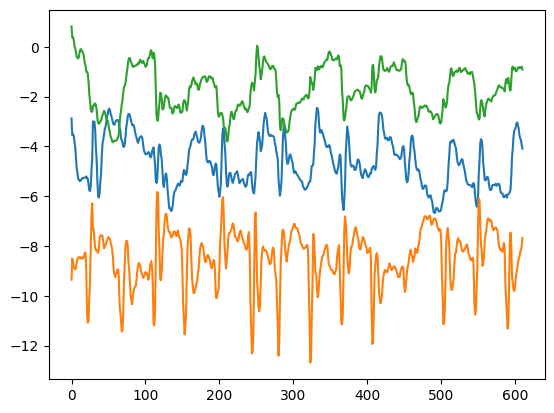

In [5]:
Valores = Data.iloc[:,:].values
Datos_aux= Valores[7,2][0:-1]
Datos_XYZ = np.array(Datos_aux)
Datos_XYZ
plt.plot(Datos_XYZ)
print(Datos_XYZ.shape)

In [6]:
Train_data = Obtener_dataset(train)
print(Train_data.shape)
Test_data = Obtener_dataset(test)
print(Test_data.shape)

(18330, 3)
(9165, 3)


(18330, 3)


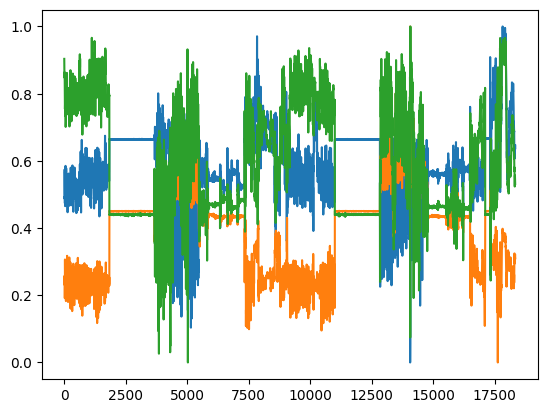

In [7]:
Scaler = MinMaxScaler()
Scaler.fit(Train_data)
Train_data_N = Scaler.transform(Train_data)
plt.plot(Train_data_N)
print(Train_data_N.shape)

## **Etapa 2: Crear X_Train y Y_Train**

### XTrain

In [8]:
XTrain_mov = np.zeros((10,1833,3))

for i in range(10):
    XTrain_mov[i,:,0] = Train_data_N[i*1833:(i+1)*1833,0].T
    XTrain_mov[i,:,1] = Train_data_N[i*1833:(i+1)*1833,1].T
    XTrain_mov[i,:,2] = Train_data_N[i*1833:(i+1)*1833,2].T
print(XTrain_mov.shape)

(10, 1833, 3)


### YTrain

In [9]:
YTrain_mov = np.zeros((10,1))
for i in range(1):
    YTrain_mov[i] = 0
for i in range(1,2):
    YTrain_mov[i] = 1
for i in range(2,3):
    YTrain_mov[i] = 2
for i in range(3,4):
    YTrain_mov[i] = 3
for i in range(4,5):
    YTrain_mov[i] = 4
for i in range(5,6):
    YTrain_mov[i] = 0
for i in range(6,7):
    YTrain_mov[i] = 1
for i in range(7,8):
    YTrain_mov[i] = 2
for i in range(8,9):
    YTrain_mov[i] = 3
for i in range(9,10):
    YTrain_mov[i] = 4
    
YTrain_mov = keras.utils.to_categorical(YTrain_mov)

In [10]:
YTrain_mov.shape

(10, 5)

### XTest

In [11]:
XTest_mov = np.zeros((5,1833,3))

for i in range(5):
    XTest_mov[i,:,0] = Train_data_N[i*1833:(i+1)*1833,0].T
    XTest_mov[i,:,1] = Train_data_N[i*1833:(i+1)*1833,1].T
    XTest_mov[i,:,2] = Train_data_N[i*1833:(i+1)*1833,2].T
print(XTest_mov.shape)

(5, 1833, 3)


### YTest

In [12]:
YTest_mov = np.zeros((5,1))
for i in range(1):
    YTest_mov[i] = 0
for i in range(1,2):
    YTest_mov[i] = 1
for i in range(2,3):
    YTest_mov[i] = 2
for i in range(3,4):
    YTest_mov[i] = 3
for i in range(4,5):
    YTest_mov[i] = 4
    
YTest_mov = keras.utils.to_categorical(YTest_mov)

In [13]:
YTest_mov

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## **Etapa 3: Modelos**

### Crear Modelo Conv1D

Epoch 1/150
1/1 [==============================] - 0s 441ms/step - loss: 1.6166 - accuracy: 0.2000
Epoch 2/150
1/1 [==============================] - 0s 13ms/step - loss: 1.4689 - accuracy: 0.2000
Epoch 3/150
1/1 [==============================] - 0s 14ms/step - loss: 1.3002 - accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 12ms/step - loss: 1.1142 - accuracy: 0.7000
Epoch 5/150
1/1 [==============================] - 0s 13ms/step - loss: 0.9306 - accuracy: 0.7000
Epoch 6/150
1/1 [==============================] - 0s 13ms/step - loss: 0.7638 - accuracy: 0.7000
Epoch 7/150
1/1 [==============================] - 0s 14ms/step - loss: 0.6109 - accuracy: 0.8000
Epoch 8/150
1/1 [==============================] - 0s 13ms/step - loss: 0.4890 - accuracy: 0.8000
Epoch 9/150
1/1 [==============================] - 0s 13ms/step - loss: 0.3903 - accuracy: 0.9000
Epoch 10/150
1/1 [==============================] - 0s 14ms/step - loss: 0.3149 - accuracy: 1.0000
Epoch 11/150
1/1 [

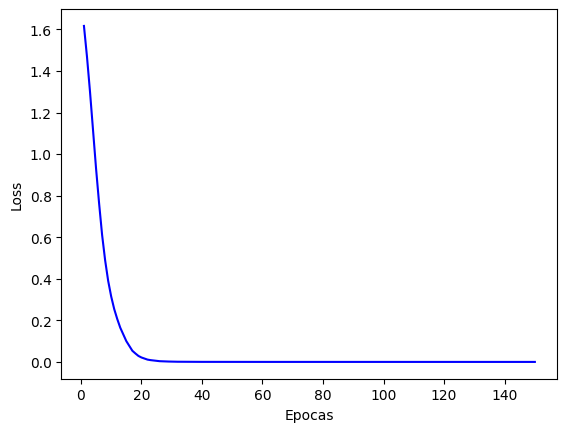

In [14]:
modelo = keras.Sequential()
modelo.add(keras.layers.Conv1D(64,3,activation='relu',padding='same',input_shape = (1833,3)))
modelo.add(keras.layers.Conv1D(32,3,activation='relu',padding='same'))
modelo.add(keras.layers.Conv1D(16,3,activation='relu',padding='same'))
modelo.add(keras.layers.MaxPool1D(pool_size=2,strides=2,padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(5,activation='softmax'))
modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
historia = modelo.fit(XTrain_mov,YTrain_mov,epochs=150,batch_size=None)
train_loss = historia.history['loss']
epocas = range(1,len(train_loss)+1)
plt.plot(epocas,train_loss,'b',label='Perdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()

In [15]:
Scaler_test = MinMaxScaler()
Scaler_test.fit(Test_data)
Test_data_N = Scaler_test.transform(Test_data)

1/1 [==============================] - 0s 73ms/step


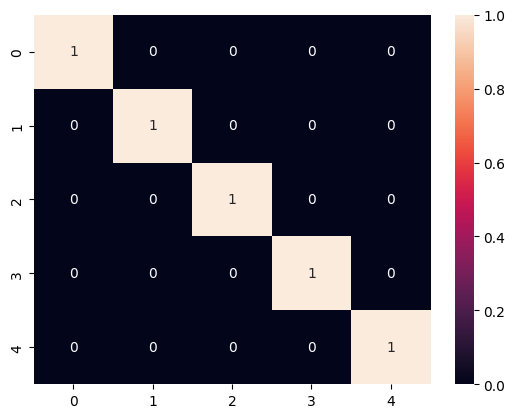

In [16]:
ypredic_mov = modelo.predict(XTest_mov)
y_test_class = np.argmax(YTest_mov,axis=1)
y_pres_class = np.argmax(ypredic_mov,axis=1)
cm = confusion_matrix(y_test_class,y_pres_class)
heatmap = sns.heatmap(pd.DataFrame(cm),annot=True,fmt='d')


In [17]:
modelo.evaluate(XTest_mov,YTest_mov)

1/1 [==============================] - 0s 106ms/step - loss: 3.4999e-05 - accuracy: 1.0000


[3.499854210531339e-05, 1.0]

### Crear MLP

In [18]:
print(XTrain_mov.shape)
print(YTrain_mov.shape)

(10, 1833, 3)
(10, 5)


In [19]:
Xtrain_mov = XTrain_mov.reshape((10,1833*3))
Ytrain_mov = YTrain_mov.reshape(10,5)

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=100, random_state=42)
mlp.fit(Xtrain_mov, Ytrain_mov)

c:\Users\PC\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [21]:
Xtest_mov = XTest_mov.reshape((5,1833*3))
Ytest_mov = YTest_mov.reshape(5,5)

In [22]:
p = mlp.predict(Xtest_mov)
acc = accuracy_score(Ytest_mov, p)
print(acc)

0.8


### Redes Neuronales Recurrentes

In [23]:
modelo_RNN = keras.models.Sequential([(keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,3],activation='relu')),
                                      (keras.layers.SimpleRNN(5)),
                                      (keras.layers.Dense(5))])
modelo_RNN.summary()
modelo_RNN.compile('adam','mse',metrics=['mse'])
# historia_RNN  = modelo_RNN.fit(X_train_E,Y_train_E,validation_data=(X_test_E,Y_test_E),epochs=100, verbose=1)
historia_RNN  = modelo_RNN.fit(XTrain_mov,YTrain_mov,validation_data=(XTest_mov,YTest_mov),epochs=100, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          480       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 130       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
Total params: 640 (2.50 KB)
Trainable params: 640 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2975 - mse: 0.2975 - val_loss: 0.2886 - val_mse: 0.2886
Epoch 2/100
1/1 [==============================] - 0s 325ms/step - loss: 0.2917 - mse: 0.2917 - val_loss: 0.2829 - val_mse: 0.2829
Epoch 3/100
1/1 [============

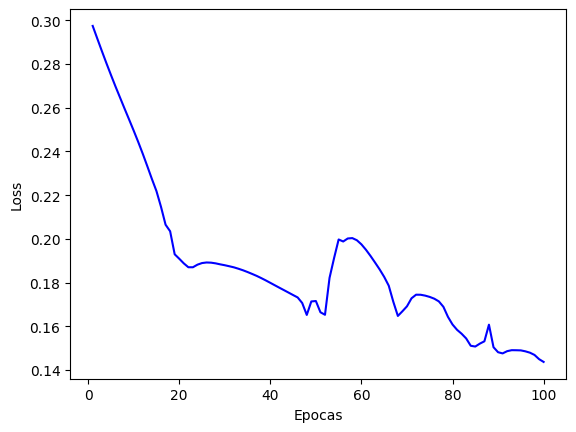

In [24]:
Train_loss = historia_RNN.history['loss']
epocas = range(1,len(Train_loss)+1)
plt.plot(epocas,Train_loss,'b',label='Perdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()

In [25]:
Ypredict = modelo_RNN(XTest_mov)
np.mean(keras.losses.mean_squared_error(YTest_mov,Ypredict))

0.14211127

# **Conclusiones**

Para el procesamiento de audio, la red Conv1D muestra el mejor desempeño en comparación con Conv2D y MLP, con una diferencia de solo 0.6, siendo Conv2D la que tiene el Accuracy más alto, con 0.53, frente a MLP con 0.4 y Conv1D con 0.26. Esto se debe a que lo que se analizaba era un espectrograma, el cual es una imagen donde el eje X se puede tomar como la variable temporal de una onda de sonido y el eje Y como la intensidad del sonido.

Por otro lado, para el procesamiento de la diferenciación de movimientos, las 2 de las 3 redes: Conv1D, MLP tuvieron un desempeño muy similar de 1 y 0.8, mientras que la Red Recurrente tuvo un accuracy del 0.14 . Este buen desempeño se debe a que las 5 categorías de movimiento se segmentaron de manera tal que fueran saficlmente reconocibles, lo que hizo que el modelo clasificara un movimiento diferente de otro de manera muy precisa, por otro lado la red recurrente tuvo problemas pues detecto toda la onda como una sola la cual solo tenia cambios que analizaba tomando en cuenta datos pasados de la misma serie.

Los resultados de las redes no son lo mejor no por un pobre desempeño de estas sino a la calidad de los datos como tal, un muestreo mas amplio de datos, asi como una mejor diferenciacion entre cada una de las categorrias como puede ser grabar sonidos mas diferenciables entre si como puede ser una cancion vs una charla, una cocina en la que se prepare algo y no solo este vacia, movimientos como puede ser saltar, correr y no solo caminar y subir gradas pueden dar mejores predicciones, tambien para obtener mejores resultados sobre todo en la parte de movimientos tratar a cada una de las diferentes ondas de manera separada, para que en el momento que se requiera reconocer el movimiento de un sensor, la red neuronal sea capaz de clasificarlo como una caminata, un trote etc. 